### Image `ROI` Region of Intrest.

In this notebook we are going to learn how to extract `ROI` from images using clustering algorithims. These algorithmns can be very effective in segmenting region of intrest in medical images such as those in skin cancer.




First we are going to install all the packages that we are going to use in this notebook.


In [1]:
pip install opencv-python fuzzy-c-means threadpoolctl==3.1.0 scikit-image -q

Note: you may need to restart the kernel to use updated packages.


Next we are going to import all the packages that we will use in this notebook.

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, morphology, exposure
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, Birch
from numpy import zeros, newaxis
from sklearn.metrics.cluster import adjusted_rand_score
from math import log10, sqrt
import pandas as pd
from fcmeans import FCM
from sklearn.metrics.cluster import rand_score
from skimage.metrics import structural_similarity as compare_ssim
import statistics as stat

Next we are going to define a clusture_mage function wich takes in labels and return a clustured image together with it's label.

In [3]:
def cluster_image(labels):
    BW = np.ones(RGB.shape)
    R,C,o = RGB.shape
    labels = labels.reshape(R,C)
    x,y = labels.shape
    center_cluster = labels[x//2-x//6:x//2+x//6,y//2-y//6:y//2+y//6]
    labels=labels.reshape((R,C))
    
    c = stat.mode(center_cluster.reshape(-1).tolist())
    for i in range(R):
        for j in range(C):
            if labels[i,j] == c :
                BW[i,j,0] =RGB[i,j,0]
                BW[i,j,1] =RGB[i,j,1]
                BW[i,j,2] =RGB[i,j,2]
            else:
                BW[i,j] = [255,255,255]

    BW = BW.astype('uint8')
    return BW, labels

There are various clustering algorithim that can be used to do image clustering, In the following code cells we are going to define them.

### 1. BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

`Description`: Hierarchical clustering method that builds a tree structure called the CF Tree for efficient clustering.

`
Applicati`on: Suitable for large datasets, as it handles large amounts of data efficiently.


In [4]:
def Birch_cluster():
    birch = Birch(n_clusters=2)
    birch.fit(feature_image.astype('int'))
    labels = birch.labels_
    return labels

### 2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

``Description``: Groups together points that are closely packed and marks points in low-density regions as outliers.

``Application``: Effective for identifying irregularly shaped clusters and noise, suitable for complex skin lesion images.

In [5]:
def db_scan():
    labimg = cv2.cvtColor(RGB, cv2.COLOR_BGR2LAB)
    feature_image=np.reshape(labimg, [-1, 3])
    rows, cols, chs = labimg.shape
    db = DBSCAN(eps=2, min_samples=300, metric = 'euclidean',algorithm ='auto')
    db.fit(feature_image)
    labels = db.labels_
    return labels

### 3. Fuzzy C-Means

``Description``: Similar to K-Means but allows each data point to belong to multiple clusters with varying degrees of membership.

``Application``: Useful for images with soft boundaries where a pixel might belong to more than one region.

In [6]:
def fuzzyC():
    fcm = FCM(n_clusters=2)
    fcm.fit(feature_image)
    labels = fcm.predict(feature_image)
    ctrs_X = fcm.centers[labels]
    fcm_centers = fcm.centers
    ctrs_ = list(fcm_centers[:,0]), list(fcm_centers[:,1])
    ctrs_ = np.array(ctrs_)
    return labels

### Gaussian Mixture Model (GMM)

``Description``: Assumes that the data is generated from a mixture of several Gaussian distributions with unknown parameters.

``Application``: Effective when the data can be well-approximated by Gaussian distributions.

In [7]:
def GMM_Kmeans():
    gmm = GaussianMixture(n_components=2, random_state=42)
    labels = gmm.fit_predict(feature_image)
    gmm_segmented = labels.reshape(rows, cols)
    return labels

### K-Means Clustering

``Description``: Partitions the image into k clusters by minimizing the variance within each cluster.

``Application``: Useful for segmenting images where the number of regions (clusters) is known.

In [8]:
def Kmeans():
    kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(feature_image)
    kmeans_segmented = labels.reshape(rows, cols)
    return labels

Next let's create a folder where our results are going to be saved.

In [9]:
if not os.path.exists("result"):
    os.mkdir('result/')

Next let's have a sample of images that we want to extract the `ROI`.

In [11]:
images = ["./samples/"+i for i in os.listdir("./samples/")]

Next we are going to generate some clusters.

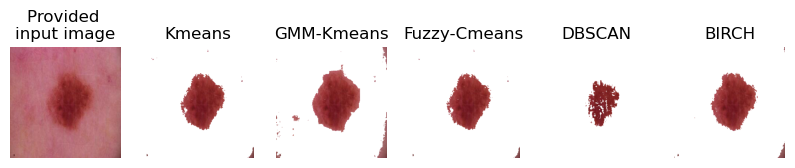

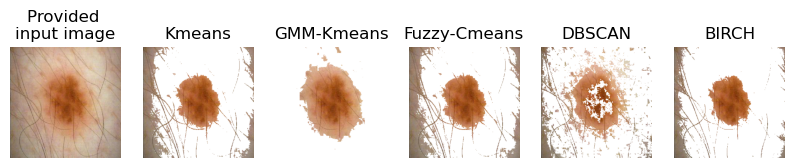

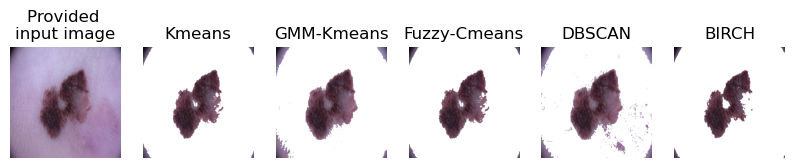

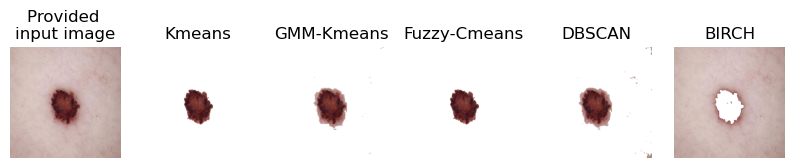

In [16]:
it = 1
for image in images:
    RGB = io.imread(image)
    labimg = cv2.cvtColor(RGB, cv2.COLOR_RGB2LAB)
    feature_image=np.reshape(labimg, [-1, 3])
    rows, cols, chs = labimg.shape
    KMeans_image  ,  KMeans_clusters  = cluster_image(Kmeans())
    GMMKM_image   ,  GMMKM_clusters   = cluster_image(GMM_Kmeans())
    fuzzyC_image  ,  fuzzyC_clusters  = cluster_image(fuzzyC())
    db_scan_image ,  db_scan_clusters = cluster_image(db_scan())
    Birch_image   ,  Birch_clusters   = cluster_image(Birch_cluster())
    #AC_image      ,  AC_clusters      = cluster_image(AC())
    all_clusters = [[KMeans_image      ,  KMeans_clusters] ,[GMMKM_image   ,  GMMKM_clusters],[fuzzyC_image  ,  fuzzyC_clusters],[db_scan_image ,  db_scan_clusters],
                    [Birch_image   ,  Birch_clusters] ]
    results = {'Process':['Kmeans','GMM-Kmeans','Fuzzy-Cmeans','DBSCAN','BIRCH','Agglomerative\nClustering']}

    f, axarr = plt.subplots(1,6,figsize=(10,2))
    axarr[0].imshow(RGB)
    axarr[0].set_title("Provided \ninput image")
    axarr[0].axis('off')
    for i in range(0,5):
        axarr[i+1].imshow(all_clusters[i][0])
        axarr[i+1].set_title(results['Process'][i])
        axarr[i+1].axis('off')
    it = it + 1
    f.savefig('result/Output'+str(it)+'.jpg')


Using clustering algorithms to segment regions of interest (ROIs) in skin cancer images before applying Convolutional Neural Networks (CNNs) can significantly enhance the performance and efficiency of the CNNs.

**Importance:**

- `ROI Isolation`: Clustering helps isolate the areas of the image that are most relevant for diagnosis, such as lesions or other abnormal regions, from the background and other non-essential parts of the image. Data Reduction: By focusing on the ROI, the amount of data that needs to be processed by the CNN is reduced, which can lead to faster training and inference times.

**Impact:**

- `Improved Accuracy`: The CNN can focus on the most relevant features for classification, improving the accuracy of the diagnosis.

- `Reduced Noise`: By eliminating irrelevant background information, clustering reduces noise and enhances the signal-to-noise ratio in the input data.